In [ ]:
import matplotlib.pyplot as plt
import pickle

comments_all = pickle.load(open( "../../pickle/comments_all/comments_0_to_38000_all.pkl", "rb" ))
comments_10 = pickle.load(open( "../../pickle/comments_all/comments_38000_to_38800_10.pkl", "rb" ))

comments_mix = comments_all.update(comments_10)
del comments_mix["post_id"]

In [2]:
import pandas
df = pandas.read_csv('../../data/reddit_wsb.csv')

In [3]:
df.loc[df['id'] == 'l6ea1b'].iloc[0].created

1611781211.0

In [21]:
times = {}
for id in comments_mix:
    if id != "post_id":
        times[id] = []
        created = df.loc[df['id'] == id].iloc[0].created
        for comment in comments_mix[id]:
            times[id].append(comment.created_utc - created)
for id in times.keys():
    times[id].sort()
        

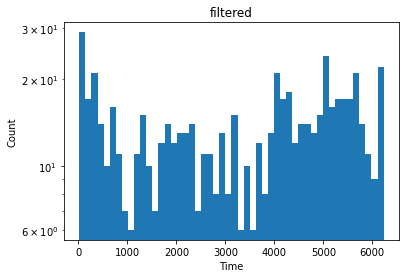

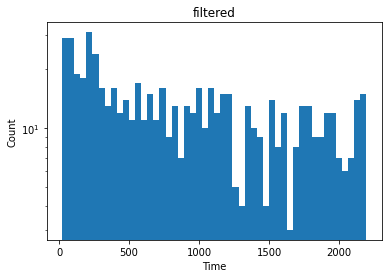

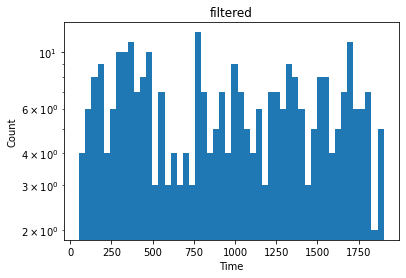

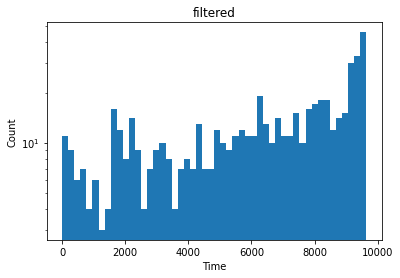

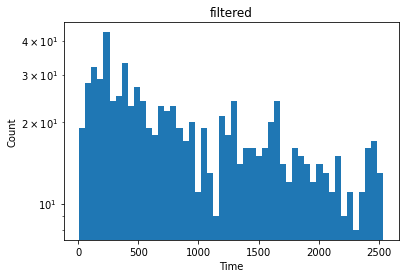

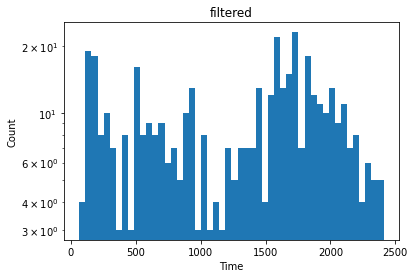

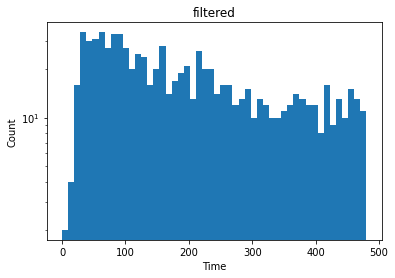

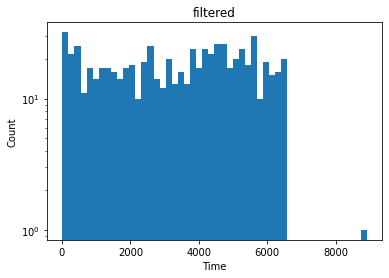

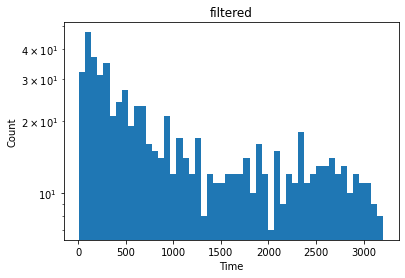

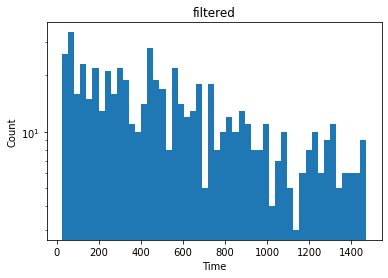

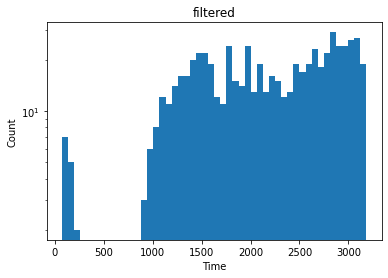

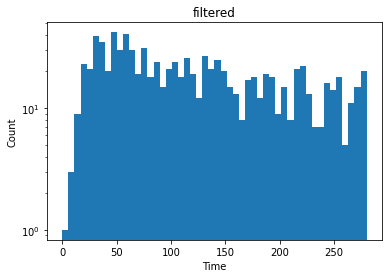

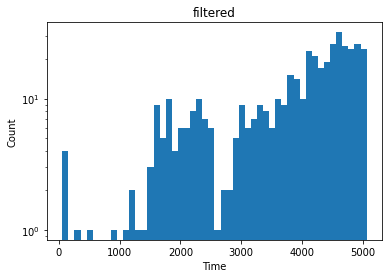

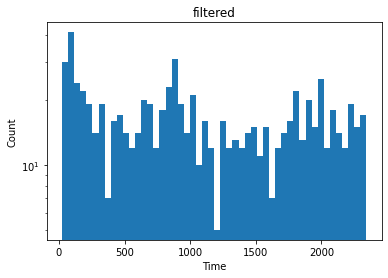

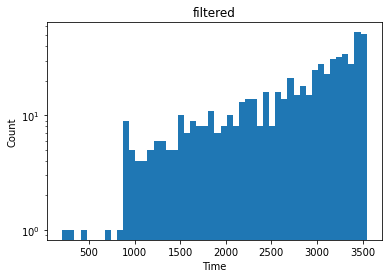

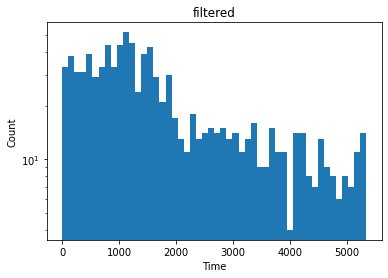

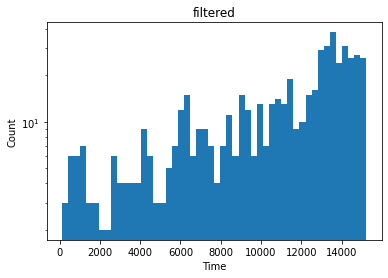

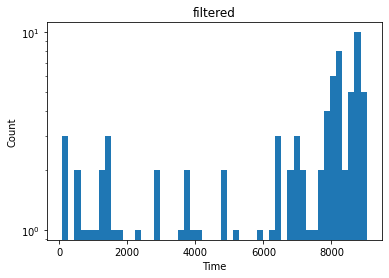

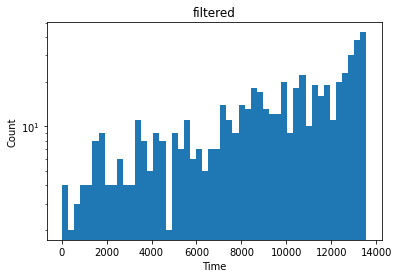

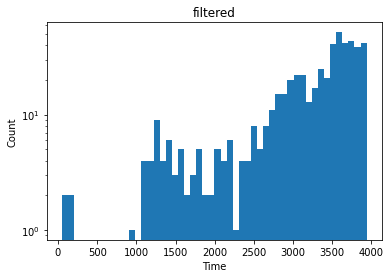

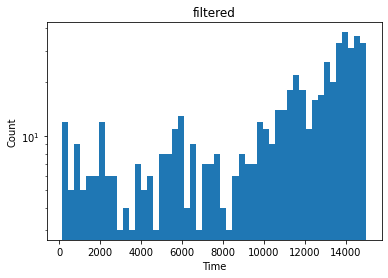

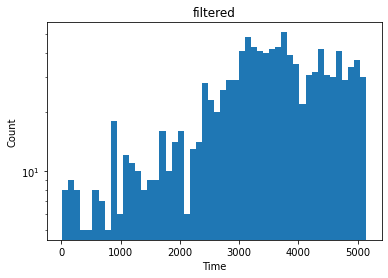

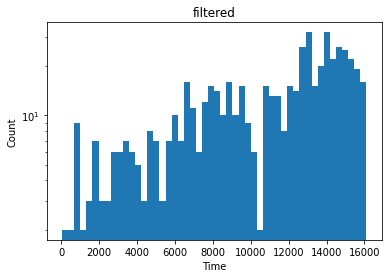

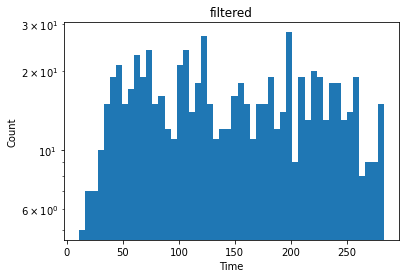

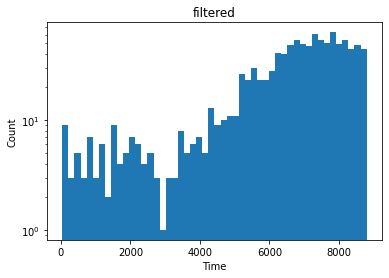

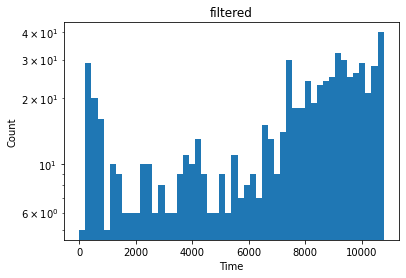

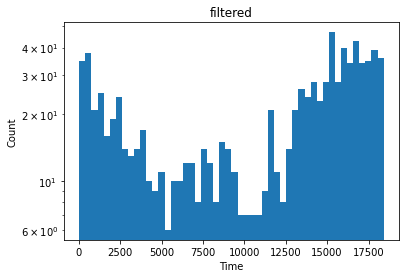

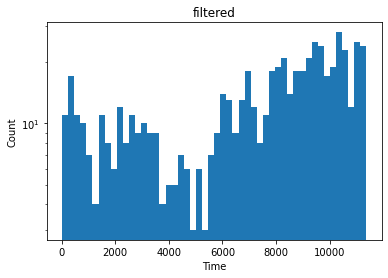

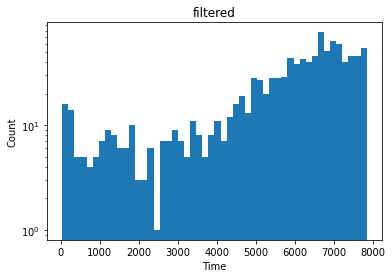

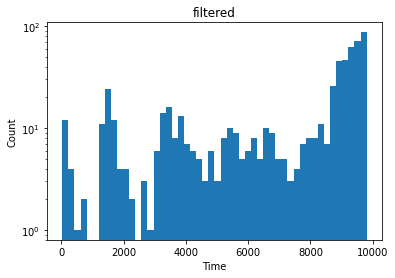

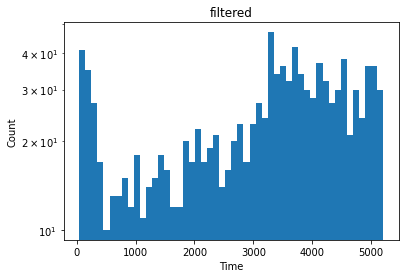

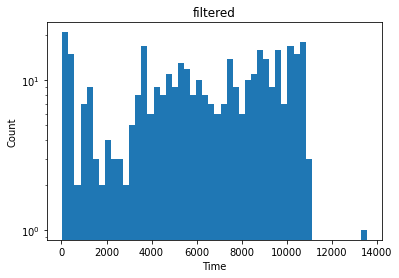

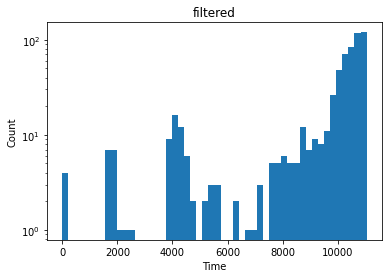

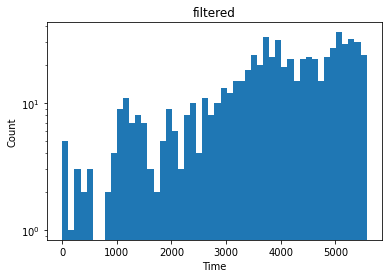

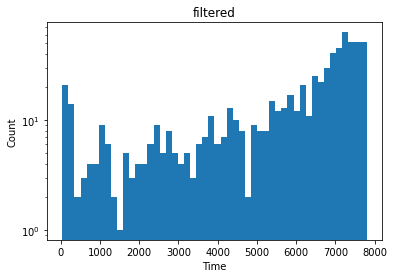

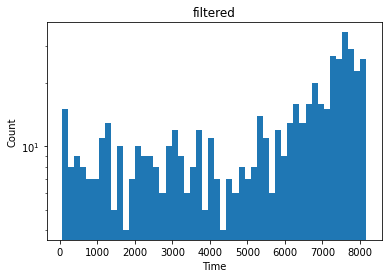

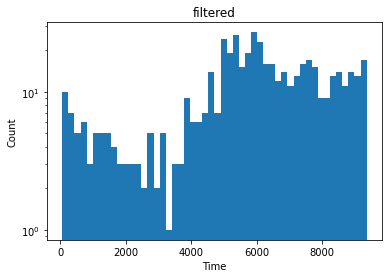

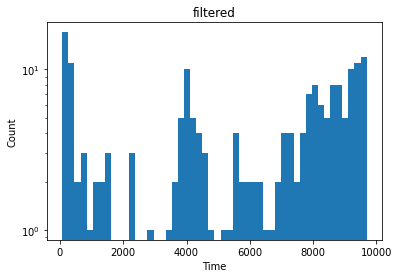

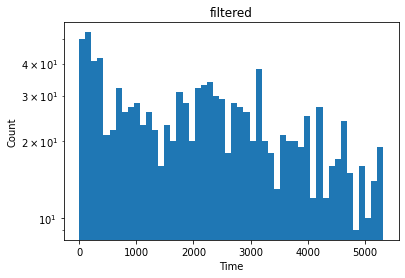

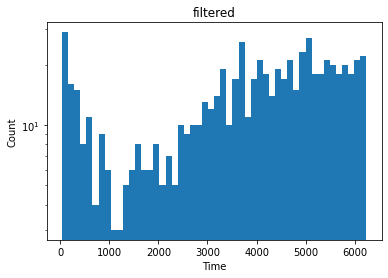

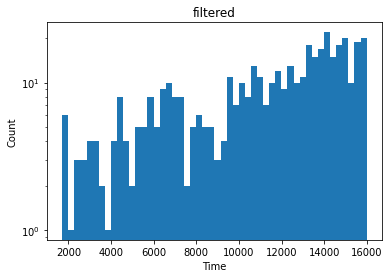

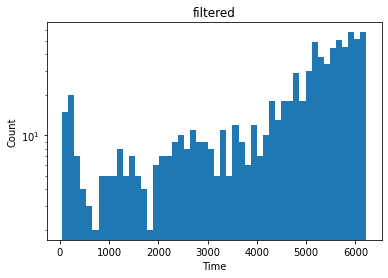

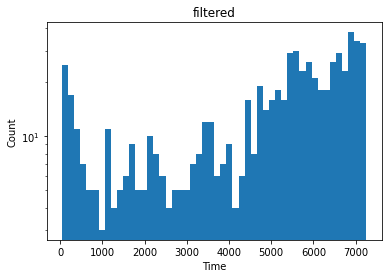

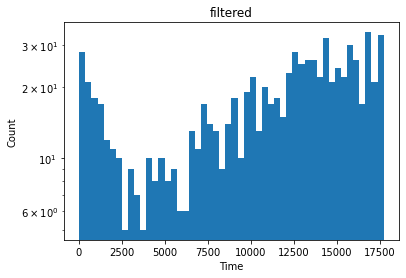

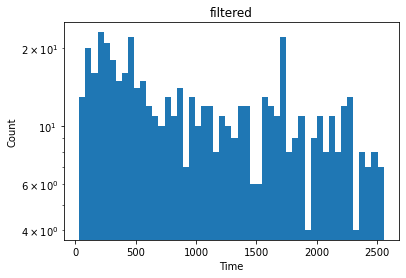

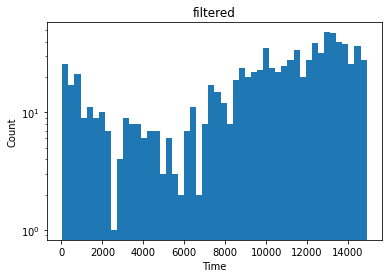

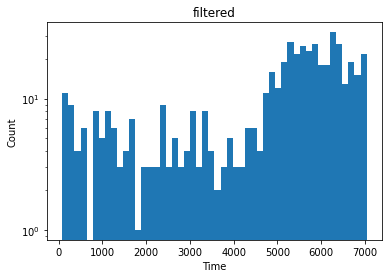

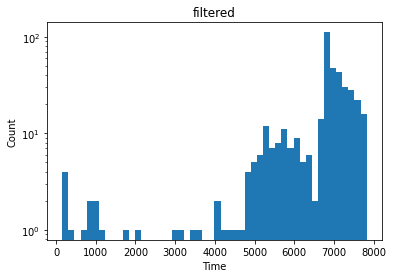

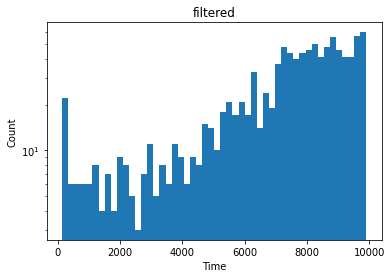

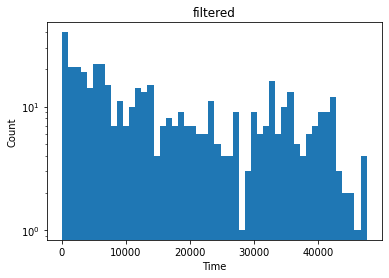

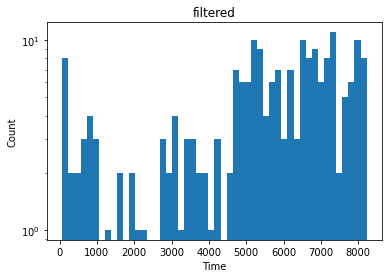

In [22]:
bins_num = 50

max_delta_tolerance = 3600

for id,v in times.items():
    filtered = []
    for i in range(len(v)):
        if i == len(v) - 1 or v[i+1]-v[i] < max_delta_tolerance:
            filtered.append(v[i])
        else:
            break
    n, bins, patches = plt.hist(filtered, bins=bins_num)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.xlabel('Time')
    plt.title('filtered')
    plt.show()
#     n, bins, patches = plt.hist(v, bins=bins_num)
#     plt.ylabel('Count')
#     plt.yscale('log')
#     plt.xlabel('Time')
#     plt.title('original')
#     plt.show()
    